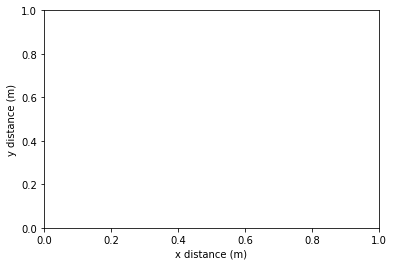

In [1]:
import matplotlib.pyplot as plt
import math
from numpy import append, matmul, array,dot
import numpy as np
from numpy.linalg import inv
T = 1/8
r = 0.1
plt.figure()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')
N_iter = 10
value_check = [None] * N_iter
for op in range (1,N_iter+1):
    value_check[op-1] = (8*op) + (op-1)


In [2]:
def kf_predict(X, P, A, Q, X_dot):
    X = dot(A, X) + X_dot
    P = dot(A, dot(P, A.T)) + Q
    return(X,P)


def kf_update(X, P, Z, C_K, R):
    IM = dot(C_K, X)
    IS = R + dot(C_K, dot(P, C_K.T))
    K = dot(P, dot(C_K.T, inv(IS)))
    X = X + dot(K, (Z-IM))
    P = P - dot(K, dot(IS, K.T))
    #P = matmul((array([[1.0, 1.0], [1.0, 1.0]])- matmul(K,C_K)), P)
    return (X,P,K,IM,IS)


In [3]:
# Initialization of state matrices
X = array([[0.0], [0.0]])
P = array([[0.0, 0.0], [0.0, 0.0]])
A = array([[1, 0], [0, 1]])
Q = array([[0.1, 0.0], [0.0, 0.15]])
X_dot= array([[(((T*r)/2)*0.2)+(0.1*T)], [(((T*r)/2)*0.2)+(0.15*T)]])


# Measurement matrices
C_K = array([[1.0, 0.0], [0.0, 2.0]])
V_k = array([[0.05], [0.075]])
R = array([[0.05, 0.0], [0.0, 0.075]])
Z = V_k + dot(C_K, X)


11
80


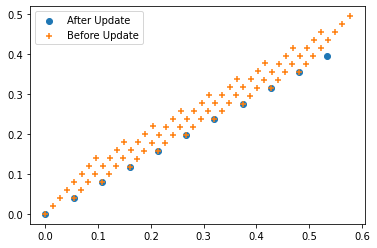

In [4]:
# Applying the Kalman Filter
X_VALUE = []
Y_VALUE = []
x_plot_afterupdate = [0]
y_plot_afterupdate =[0]
a1 = []
b1 = []
c1 = []
d1 = []
x_plot_beforeupdate = []
y_plot_beforeupdate =[]
for i in range(0, N_iter):
    for w in range(0,8):
        X_VALUE = append(X_VALUE, X[0,0])
        Y_VALUE = append(Y_VALUE, X[1,0])
        a1 = append(a1, P[0,0])
        b1 = append(b1, P[0, 1])
        c1 = append(c1, P[1, 0])
        d1 = append(d1, P[1, 1])

        x_plot_beforeupdate = append(x_plot_beforeupdate,X[0,0])
        y_plot_beforeupdate = append(y_plot_beforeupdate, X[1, 0])
        (X, P) = kf_predict(X, P, A, Q, X_dot)


    (X, P, K, IM, IS) = kf_update(X, P, Z, C_K, R)
    X_VALUE = append(X_VALUE, X[0, 0])
    Y_VALUE = append(Y_VALUE, X[1, 0])
    x_plot_afterupdate = append(x_plot_afterupdate, X[0, 0])
    y_plot_afterupdate = append(y_plot_afterupdate, X[1, 0])
    a1 = append(a1, P[0, 0])
    b1 = append(b1, P[0, 1])
    c1 = append(c1, P[1, 0])
    d1 = append(d1, P[1, 1])

    Z = V_k + dot(C_K, X)
print (len(x_plot_afterupdate))
print(len(x_plot_beforeupdate))
plt.scatter( x_plot_afterupdate, y_plot_afterupdate, label= "After Update", marker='o')
plt.scatter( x_plot_beforeupdate, y_plot_beforeupdate, label= "Before Update", marker='+')

plt.legend()
plt.show()

In [5]:
lambda_1 = [None] * N_iter*9
lambda_2 = [None] * N_iter*9
for m in range((N_iter*9)):
    lambda_1[m]= (a1[m]+d1[m])/2 + math.sqrt(math.pow((a1[m]-d1[m])/2,2)+ math.pow(b1[m],2))
    lambda_2[m] = (a1[m] + d1[m]) / 2 - math.sqrt(math.pow((a1[m] - d1[m]) / 2, 2) + math.pow(b1[m],2))
    lambda_1[m] = math.sqrt(lambda_1[m]) *150
    lambda_2[m] = math.sqrt(lambda_2[m]) *150

x_plot_beforeupdate = [k * 700 for k in x_plot_beforeupdate]
y_plot_beforeupdate = [z * 500 for z in y_plot_beforeupdate]
x_plot_afterupdate = [wrx * 700 for wrx in x_plot_afterupdate]
y_plot_afterupdate = [wrz * 500 for wrz in y_plot_afterupdate]
X_VALUE = [kk * 700 for kk in X_VALUE]
Y_VALUE = [zz * 500 for zz in Y_VALUE]


In [6]:
import pygame

def draw_dashed_line(surf, color, start_pos, end_pos, width=3, dash_length=10):
    x1, y1 = start_pos
    x2, y2 = end_pos
    dl = dash_length

    if (x1 == x2):
        ycoords = [y for y in range(y1, y2, dl if y1 < y2 else -dl)]
        xcoords = [x1] * len(ycoords)
    elif (y1 == y2):
        xcoords = [x for x in range(x1, x2, dl if x1 < x2 else -dl)]
        ycoords = [y1] * len(xcoords)
    else:
        a = abs(x2 - x1)
        b = abs(y2 - y1)
        c = round(math.sqrt(a**2 + b**2))
        dx = dl * a / c
        dy = dl * b / c

        xcoords = [x for x in np.arange(x1, x2, dx if x1 < x2 else -dx)]
        ycoords = [y for y in np.arange(y1, y2, dy if y1 < y2 else -dy)]

    next_coords = list(zip(xcoords[1::2], ycoords[1::2]))
    last_coords = list(zip(xcoords[0::2], ycoords[0::2]))
    for (x1, y1), (x2, y2) in zip(next_coords, last_coords):
        start = (round(x1), round(y1))
        end = (round(x2), round(y2))
        pygame.draw.line(surf, color, start, end, width)





pygame 2.0.0.dev6 (SDL 2.0.10, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
# Define some colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 153)
LIGHT_BLUE = (102 ,178 ,255)
YELLOW = (255, 255, 0)
DARK_GREEN = (0, 153, 0)
GREY = (160, 160, 160)

In [8]:
pygame.init()

# Set the width and height of the screen [width, height]
size = (700, 500)
screen = pygame.display.set_mode(size)

pygame.display.set_caption("My Game")

# Loop until the user clicks the close button.
done = False

# Used to manage how fast the screen updates
clock = pygame.time.Clock()
rect_xpt=0
rect_ypt=0
elip_xlength=0
elip_ylength=0
array_index = 0
before_update_index = 0
after_update_index = 0
check_index = 0
check = 0

In [9]:
# -------- Main Program Loop -----------
while not done:
    # --- Main event loop
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

    # --- Game logic should go here

    # --- Screen-clearing code goes here

    # Here, we clear the screen to white. Don't put other drawing commands
    # above this, or they will be erased with this command.

    # If you want a background image, replace this clear with blit'ing the
    # background image.

    screen.fill(BLACK)
    pygame.draw.rect(screen,WHITE, [rect_xpt,rect_ypt,5,5],5)
    for i in range (array_index):
        pygame.draw.ellipse(screen, YELLOW, [int(X_VALUE[i]) - (int(lambda_1[i]) - ((0.5 * int(lambda_1[i])) + (0.5 * 5))),int(Y_VALUE[i]) - (int(lambda_2[i]) - ((0.5 * int(lambda_2[i])) + (0.5 * 5))), int(lambda_1[i]) ,int(lambda_2[i])], 2)
    if array_index != 0:


        for i in range (before_update_index):
            pygame.draw.lines(screen, BLUE, False, [(int(x_plot_beforeupdate[i]), int(y_plot_beforeupdate[i])), (int(x_plot_beforeupdate[i + 1]), int(y_plot_beforeupdate[i + 1]))], 7)


        for ii in range(after_update_index):
            draw_dashed_line(screen, RED, (int(x_plot_afterupdate[ii]), int(y_plot_afterupdate[ii])),(int(x_plot_afterupdate[ii + 1]), int(y_plot_afterupdate[ii + 1])), dash_length=5)


    rect_xpt = int(X_VALUE[array_index])
    rect_ypt = int(Y_VALUE[array_index])
    elip_xlength = int(lambda_1[array_index])
    elip_ylength = int(lambda_2[array_index])
    if array_index == (N_iter*9) - 1:
        array_index = array_index
    else:
        array_index = array_index +1

    if value_check[check_index] == array_index or array_index > ((N_iter*9) - 2):
        before_update_index = before_update_index


    else:
        before_update_index = before_update_index +1

    if check != 1:

        if value_check[check_index] == array_index:
            after_update_index = after_update_index + 1
            check_index = check_index + 1

            if check_index == 10:
                check = 1
                check_index = check_index - 1






        else :
            after_update_index = after_update_index



    # --- Drawing code should go here

    # --- Go ahead and update the screen with what we've drawn.
    pygame.display.flip()

    # --- Limit to 60 frames per second
    clock.tick(7)

# Close the window and quit.
pygame.quit()

<ipython-input-9-cd8f26b6e38e>:21: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  pygame.draw.ellipse(screen, YELLOW, [int(X_VALUE[i]) - (int(lambda_1[i]) - ((0.5 * int(lambda_1[i])) + (0.5 * 5))),int(Y_VALUE[i]) - (int(lambda_2[i]) - ((0.5 * int(lambda_2[i])) + (0.5 * 5))), int(lambda_1[i]) ,int(lambda_2[i])], 2)
